In [89]:
from glob import glob
import pandas as pd
import rasterio
import random
import os
import shutil


In [82]:
chips_df = pd.read_csv('/workspace/gfm-gap-filling/pretraining/chip_tracker_cdl_count.csv')
single_band_dir =  '/workspace/gfm-gap-filling/pretraining/train_single_band/chips_single_band/'
shuffle_dir = '/workspace/gfm-gap-filling/pretraining/train_single_band/chips_shuffle_masks/'


Create new folder, copy HLS images

In [83]:
## make directories
dirs_to_make = [shuffle_dir]
for folder in dirs_to_make:
    try:
        os.makedirs(folder)
    except FileExistsError:
        # directory already exists
        print('pass')
        pass

pass


In [100]:
chips_df.iloc[1]

Unnamed: 0                      1
chip_id                   000_001
chip_x                 -99.142601
chip_y                  36.716007
tile                        14SMF
valid_first               49783.0
valid_second              42527.0
valid_third               47381.0
bad_pct_first             0.03986
bad_pct_second           0.398597
bad_pct_third             0.15346
first_image_date        2021087.0
second_image_date       2021212.0
third_image_date        2021272.0
bad_pct_max              0.398597
na_count                      0.0
CDL_count                 13700.0
first_cdl_mask       chip_046_061
second_cdl_mask      chip_018_025
third_cdl_mask       chip_010_021
Name: 1, dtype: object

In [98]:
mask_paths = glob(single_band_dir + "*.CDL.tif")
chips_w_mask = [item.split('/')[-1].split('.')[2] for item in mask_paths]
len(chips_w_mask)
chips_w_mask = list(set(chips_w_mask))
len(chips_w_mask)

4238

In [86]:
chips_df['first_cdl_mask'] = random.choices(chips_w_mask, k = len(chips_df))
print(chips_df.first_cdl_mask[0:5])
chips_df['second_cdl_mask'] = random.choices(chips_w_mask, k = len(chips_df))
print(chips_df.second_cdl_mask[0:5])
chips_df['third_cdl_mask'] = random.choices(chips_w_mask, k = len(chips_df))
print(chips_df.third_cdl_mask[0:5])

0    chip_064_068
1    chip_046_061
2    chip_037_031
3    chip_069_070
4    chip_013_072
Name: first_cdl_mask, dtype: object
0    chip_030_025
1    chip_018_025
2    chip_010_054
3    chip_045_060
4    chip_015_066
Name: second_cdl_mask, dtype: object
0    chip_070_054
1    chip_010_021
2    chip_048_017
3    chip_025_079
4    chip_024_015
Name: third_cdl_mask, dtype: object


In [102]:
chips_df.to_csv('/workspace/gfm-gap-filling/pretraining/chip_tracker_cdl_count.csv')

In [ ]:
for item in chips_w_mask:
   # print(item)
    chip_source_files = glob(single_band_dir + "*" + item + "*CDL.tif")
    chip_source_files.sort()
    chip_dest_files = [shuffle_dir + item.split('/')[-1] for item in chip_source_files]
    # print(chip_source_files)
    # print(chip_dest_files)
    first_mask_chip = chips_df[chips_df.chip_id == item[5:]]['first_cdl_mask'].iat[0]
    second_mask_chip = chips_df[chips_df.chip_id == item[5:]]['second_cdl_mask'].iat[0]
    third_mask_chip = chips_df[chips_df.chip_id == item[5:]]['third_cdl_mask'].iat[0]

    # print(first_mask_chip)
    # print(second_mask_chip)
    # print(third_mask_chip)
    first_mask_file = glob(single_band_dir + "*" + first_mask_chip + "*CDL.tif")[0]
    second_mask_file = glob(single_band_dir + "*" + second_mask_chip + "*CDL.tif")[0]
    third_mask_file = glob(single_band_dir + "*" + third_mask_chip + "*CDL.tif")[0]
    # print(first_mask_file)
    # print(second_mask_file)
    # print(third_mask_file)
    shutil.copyfile(first_mask_file, chip_dest_files[0])
    shutil.copyfile(second_mask_file, chip_dest_files[1])
    shutil.copyfile(third_mask_file, chip_dest_files[2])


In [ ]:
! pip install matplotlib

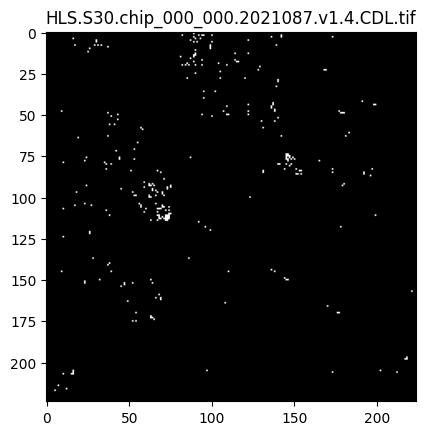

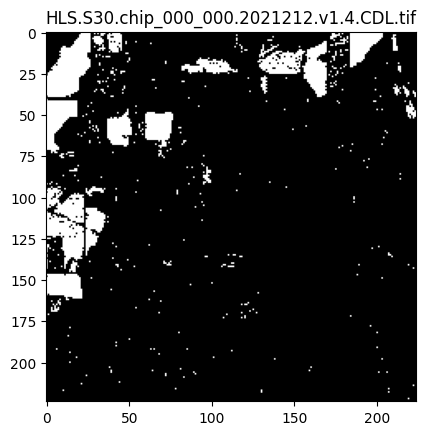

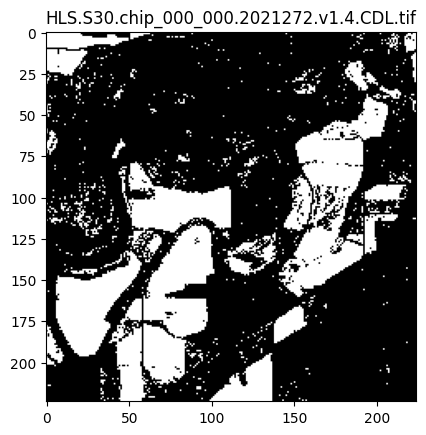

In [96]:
import matplotlib.pyplot as plt

def plot_all_tifs(folder_path, k = 3):
    files = os.listdir(folder_path)
    files.sort()
    for filename in files[0:k]:
        if filename.endswith(".tif"):
            file_path = os.path.join(folder_path, filename)
            with rasterio.open(file_path) as dataset:
                data = dataset.read(1)  # Assuming the TIF is single-band
                plt.imshow(data, cmap='gray')
                plt.title(filename)
                plt.show()
plot_all_tifs(shuffle_dir)
